In [84]:
import pandas as pd
import geopandas as gpd
import numpy as np
import itertools

import matplotlib.pyplot as plt
from shapely.geometry import Point, Polygon, LineString
import seaborn as sns

import scipy.stats as stats
#from scipy.spatial.distance import pdist, squareform
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics import silhouette_score


In [30]:
acc = pd.read_csv('../data/cleaned/coll_coord.csv', low_memory=False)

In [31]:
# acc['latitude'][0]

In [32]:
acc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202131 entries, 0 to 202130
Data columns (total 41 columns):
Unnamed: 0         202131 non-null object
OBJECTID           202130 non-null float64
INCKEY             202130 non-null float64
COLDETKEY          202130 non-null float64
REPORTNO           202130 non-null object
STATUS             202130 non-null object
ADDRTYPE           202130 non-null object
INTKEY             67263 non-null float64
LOCATION           202130 non-null object
EXCEPTRSNCODE      84141 non-null object
EXCEPTRSNDESC      7190 non-null object
SEVERITYCODE       202129 non-null object
SEVERITYDESC       202130 non-null object
COLLISIONTYPE      179243 non-null object
PERSONCOUNT        202130 non-null float64
PEDCOUNT           202130 non-null float64
PEDCYLCOUNT        202130 non-null float64
VEHCOUNT           202130 non-null float64
INJURIES           202130 non-null float64
SERIOUSINJURIES    202130 non-null float64
FATALITIES         202130 non-null float64


In [33]:
points=acc[['longitude','latitude']]

In [34]:
acc[['longitude','latitude']].describe()

,longitude,latitude
count,202130.000000,202130.000000
mean,-122.330756,47.620396
std,0.030076,0.055923
min,-122.419091,47.495573
25%,-122.349311,47.577939
50%,-122.330412,47.616269
75%,-122.311993,47.664304
max,-122.238951,47.734142


In [35]:
acc[['longitude','latitude']].isnull().sum()

longitude    1
latitude     1
dtype: int64

In [36]:
acc[acc['longitude'].isnull()]

,Unnamed: 0,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,LOCATION,EXCEPTRSNCODE,...,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR,longitude,latitude
202130,latitude,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [38]:
acc=acc.drop([202130],axis=0)

In [39]:
acc[['longitude','latitude']].isnull().sum()

longitude    0
latitude     0
dtype: int64

In [47]:
X = np.array(acc[['longitude','latitude']])

In [66]:
sel_size=200
x=X[:sel_size]

In [71]:
km = KMeans(50)
labels = km.fit_predict(X)

In [72]:
l=labels[:sel_size]

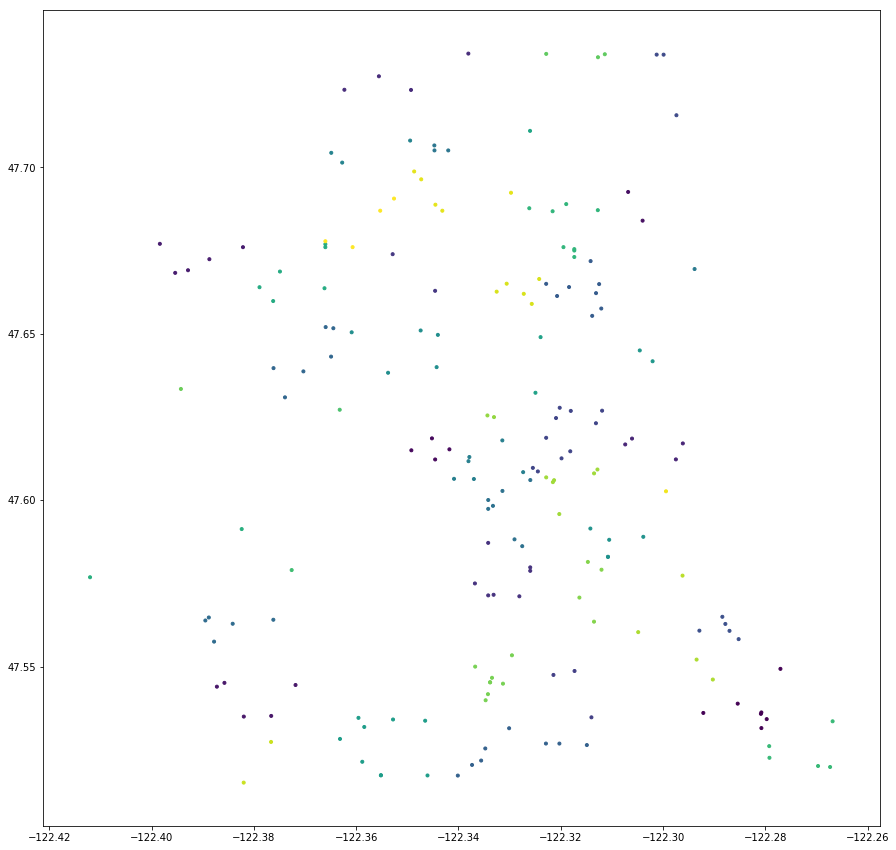

In [75]:
fig, ax = plt.subplots(figsize=(15,15))
ax.scatter(x[:,0],x[:,1],c=l,marker='.')

In [80]:
c = km.cluster_centers_

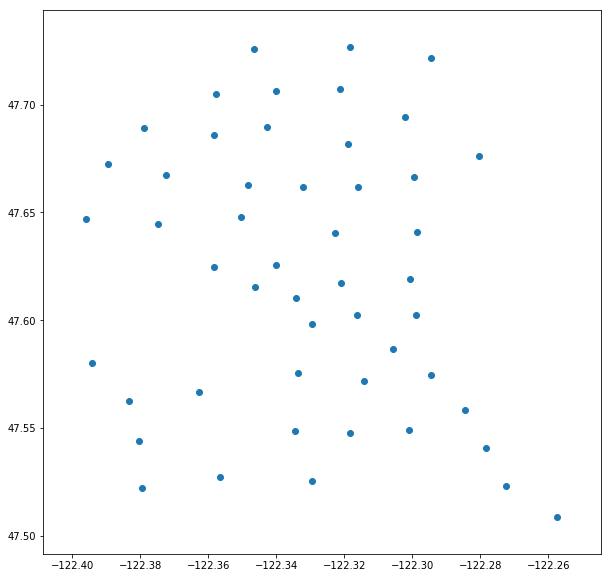

In [81]:
fig, ax = plt.subplots(figsize=(10,10))
ax.scatter(c[:,0],c[:,1])

In [118]:
x=X[:2000]
maxk = 10
wcss = np.zeros(maxk)

for k in range(1, maxk):
#     print(k)
    km = KMeans(k)
#     print('km')
    y = km.fit_predict(x)
#     print('fit')
    for c in range(0, k):
#         print('c')
        for i1, i2 in itertools.combinations([ i for i in range(len(y)) if y[i] == c ], 2):
#             print('i1:',i1, ' i2:', i2)
            wcss[k] += sum(x[i1] - x[i2])**2
    wcss[k] /= 2

Text(0, 0.5, 'within-cluster sum of squares')

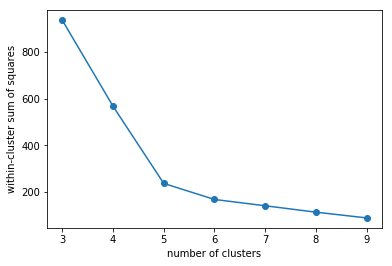

In [119]:
fig, ax = plt.subplots()
ax.plot(range(3,maxk), wcss[3:maxk], 'o-')
ax.set_xlabel("number of clusters")
ax.set_ylabel("within-cluster sum of squares")

### K-means is not going to give good clusters in this case. 
We need density-based clustering. --> other notebook